## Variables transformadas

El contenido de etileno en semillas de lechuga (y, en nl/g peso en seco) se estudió como función de la exposición de tiempo (x, en min) a un absorbente de etileno. Realice un gráfico de los datos y explique qué modelo sugiere. Obtenga la función de regresión de su modelo propuesto y genere gráficos de diagnóstico que soporten su decisión.

In [1]:
datos_x = [2,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
datos_y = [408, 274, 196, 137, 90, 78, 51, 40, 30, 22, 15]

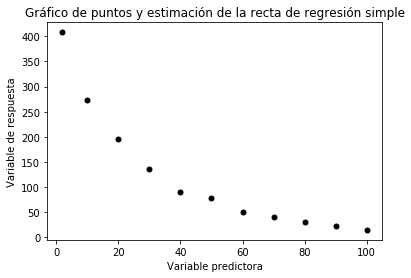

In [3]:
# Se importa librería matplotlib para realizar la gráfica de puntos
# En caso de que la gráfica no se muestre, volver a correr esta celda (hay un bug en el código que no he podido encontrar)
import matplotlib.pyplot as plt

plt.scatter(x=datos_x, y=datos_y,  marker='o', c='black', s=25)
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Variable predictora")
plt.ylabel("Variable de respuesta")
plt.show()
plt.show()

### ¿Que sucede su tratamos de ajustar un modelo lineal a este conjunto de datos?

In [5]:
# Convirtiendo nuestra lista de datos en arrays de datos
import numpy as np

array_x = np.array(datos_x)
array_y = np.array(datos_y)

In [6]:
# Importamos la librería numpy para la simplificación de operaciones
import statsmodels.api as sm

array_x_constant = sm.add_constant(array_x)

reg = sm.OLS(array_y, array_x_constant).fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     34.47
Date:                Mon, 18 May 2020   Prob (F-statistic):           0.000237
Time:                        22:31:39   Log-Likelihood:                -59.498
No. Observations:                  11   AIC:                             123.0
Df Residuals:                       9   BIC:                             123.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        291.2985     34.016      8.564      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [7]:
residuales = reg.resid_pearson
valores_ajustados = reg.fittedvalues

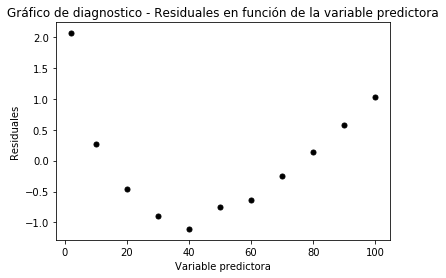

In [8]:
# Se importa librería matplotlib para realizar la gráfica de puntos
import matplotlib.pyplot as plt

plt.scatter(x=datos_x, y=residuales,  marker='o', c='black', s=25)
plt.title("Gráfico de diagnostico - Residuales en función de la variable predictora")
plt.xlabel("Variable predictora")
plt.ylabel("Residuales")
plt.show()
plt.show()

Tenemos como resultado un $r^2$ de 0.793 el cual podría ser aceptable bajo algunos escenarios. Sin embargo, el gráfico de diagnostico es evidencia suficiente de que se debe tratar de ajustar otro modelo de regresión. El gráfico de dispersión con un valor de respuesta como curva decreciente sugiere que una función exponencial dará un buen ajuste a los datos.

In [9]:
# Convirtiendo nuestra lista de datos en arrays de datos
import numpy as np

array_x = np.array(datos_x)
array_y = np.array(datos_y)

# Transformamos la variable y aplicandole logaritmo natural cada uno de los 
# datos utilizando las propiedades de la librería numpy
y_transformada = np.log(array_y)

La transformación llevada a cabo es: $$y' = \ln{y}$$

In [10]:
print(y_transformada)

[6.01126717 5.61312811 5.27811466 4.91998093 4.49980967 4.35670883
 3.93182563 3.68887945 3.40119738 3.09104245 2.7080502 ]


En este paso sería interesante ver cual es la relación entre $x$ y la $y$ transformada. El siguiente gráfico sugiere que se puede aplicar un ajuste lineal a los datos transformados.

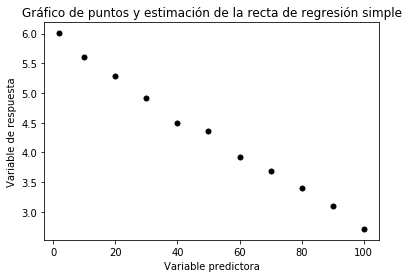

In [11]:
# Genera grafico
plt.scatter(x=datos_x, y=y_transformada,  marker='o', c='black', s=25)
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Variable predictora")
plt.ylabel("Variable de respuesta")
plt.show()
plt.show()

In [12]:
# Importamos la librería numpy para la simplificación de operaciones
import statsmodels.api as sm

array_x_constant = sm.add_constant(array_x)

reg = sm.OLS(y_transformada, array_x_constant).fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1857.
Date:                Mon, 18 May 2020   Prob (F-statistic):           9.73e-12
Time:                        22:44:15   Log-Likelihood:                 13.561
No. Observations:                  11   AIC:                            -23.12
Df Residuals:                       9   BIC:                            -22.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9405      0.044    133.850      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Con el siguiente código se obtienen los coeficiente del método OLS y se realiza un plot para ver como ajusta la línea de regresión a los datos transformados.

In [13]:
beta_0, beta_1 = reg.params

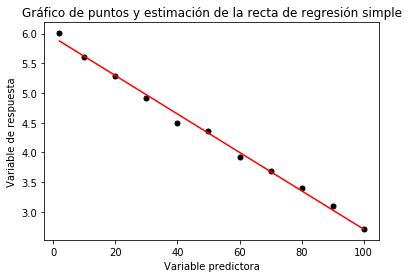

In [14]:
# Se importa librería matplotlib para realizar la gráfica de puntos
import matplotlib.pyplot as plt

plt.scatter(x=datos_x , y=y_transformada,  marker='o', c='black', s=25)
plt.plot(array_x, beta_0 + beta_1 * array_x, '-', c='red')
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Variable predictora")
plt.ylabel("Variable de respuesta")
plt.show()

Tenemos como resultado un $r^2$ de 0.995. La recta de regresión que se encontró parece ajustar bastante bien a los datos. Se pueden añadir algunos gráficos de diagnóstico para soportar nuestra conclusión.

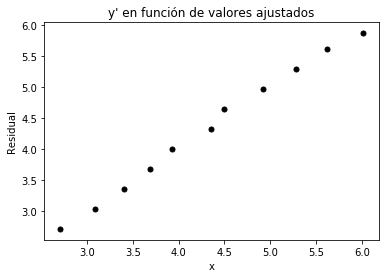

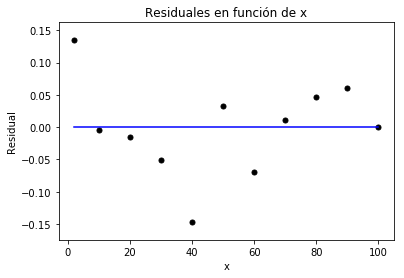

In [19]:
# Redefinimos las variables residuales y valores ajustados para obtener 
# los valores de la nueva regresión y generar nuevamente gráficos de diagnostico
residuales = reg.resid
valores_ajustados = reg.fittedvalues

import matplotlib.pyplot as plt

# Residuales generados por la librería
plt.scatter(x=y_transformada, y=reg.fittedvalues,  marker='o', c='black', s=25)
plt.title("y' en función de valores ajustados")
plt.xlabel("x")
plt.ylabel("Residual")
plt.show()

# Residuales estandarizados generados por nostros
plt.scatter(x=datos_x, y=residuales,  marker='o', c='black', s=25)
plt.plot(array_x, 0 * array_x, '-', c='blue')
plt.title("Residuales en función de x")
plt.xlabel("x")
plt.ylabel("Residual")
plt.show()